- The dataset is of default and non-defaulted payments in Taiwan - subset to use here in our training.
- The aim of this exercise is to classify default using the covariates
- Use the skills you have learned, and have enough materials to convince your ED (Helene Weiner) this model is fit to share with a client
- The winner, based purely on accuracy classification score, will win a tantalizing prize!

Data set description:

From the UCI Machine Lerning Repository:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



# Part 1

Load the data into JupyterLab.

- Name the dataset rawdata
- Show/plot some summaries of the data that could be useful


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../data/default of credit card clients vCapstone.xls', header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Default'], dtype='object')

In [5]:
import seaborn as sns

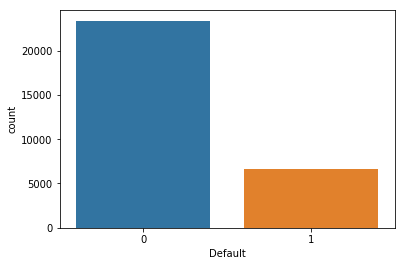

In [6]:
sns.countplot(x='Default', data=df)

In [7]:
#from sklearn.model_selection import train_test_split

In [8]:
df.shape

(30000, 7)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0


In [10]:
# pd.qcut(df['AGE'], 3)

In [11]:
#df.filter(regex='^BILL').head()

In [12]:
df = df.drop(['ID'], 'columns')

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#df2 = df.rename({'default payment next month': 'y'}, axis='columns')

In [14]:
#df2.head()

In [15]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default
8951,20000,1,3,1,28,0
16929,60000,1,2,1,52,0
27392,160000,1,2,1,46,0
26357,500000,2,1,2,32,0
29608,40000,1,2,1,40,1


# Part 2

Subset the data into a training (50%) and test set (50%)

- Name them train and test
- Show some summaries of the test and train dataset


In [16]:
l = [1, 2, 3, 4]
l[:2]

[1, 2]

In [17]:
l[2:]

[3, 4]

In [18]:
train = df.iloc[:15000]

In [19]:
test = df.iloc[15000:]

# Part 3

Build a logistic regression model on the defaults
- What are the coefficients you picked?
- Are they significant?
- Create a function to calculate accuracy (TP + TN / TP + FP + FN + TN)


In [20]:
"Default ~ " + ' + '.join(train.columns[:-1])

'Default ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE'

In [21]:
model = smf.logit("Default ~ " + ' + '.join(train.columns[:-1]), data=train)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.513283
         Iterations 6


In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14994
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:                 0.02679
Time:                        15:43:03   Log-Likelihood:                -7699.2
converged:                       True   LL-Null:                       -7911.2
                                        LLR p-value:                 2.073e-89
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3103      0.158     -1.968      0.049      -0.619      -0.001
LIMIT_BAL  -3.474e-06   1.86e-07    -18.647      0.000   -3.84e-06   -3.11e-06
SEX           -0.1359      0.041     -3.328      0.001      -0.216      -0.056
EDUCATION     -0.1012      0.027     -3.688      0.000      -0.155      -0.047
MARRIAGE      -0.1763      0.042     -4.151      0.000      -0.260      -0.093
AGE            0.0073      0.002      3.078      0.002       0.003       0.012
==============================================================================
"""

In [23]:
#np.exp(results.params)
results.predict(train.drop('Default', axis='columns'))

8951     0.311937
16929    0.342192
27392    0.260221
26357    0.073136
29608    0.338112
5092     0.070815
27932    0.207538
13300    0.267215
3359     0.236882
20360    0.180876
18768    0.262254
26467    0.258930
28728    0.271396
10834    0.200500
9521     0.213421
23611    0.175050
27474    0.139557
12493    0.334453
6696     0.198195
17054    0.240447
5411     0.226062
20867    0.238681
12076    0.186069
21038    0.205544
25589    0.125496
12939    0.301408
7006     0.150531
24146    0.101353
5306     0.088208
14444    0.083322
           ...   
27917    0.190065
27953    0.263641
14956    0.281404
15715    0.201497
2730     0.257875
25085    0.345086
12235    0.317047
14993    0.141188
25845    0.192903
6376     0.221373
2603     0.134439
21199    0.199428
27613    0.215053
25229    0.241005
13500    0.227105
3786     0.105184
25503    0.178099
10208    0.370906
18187    0.267698
754      0.088598
24515    0.233581
28529    0.295555
15483    0.106001
14394    0.108449
22737    0

In [24]:
res = results.predict(train.drop('Default', axis='columns')) > .5

In [25]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(train['Default'], res).ravel()

In [26]:
# TP + TN / TP + FP + TN + FN
(tp + tn) / (tp + fp + tn + fn)

0.7796

# Part 4

Test the model on the test set
- Chart the distribution of the class probabilities from the training set (do
a decile plot)
- Use the accuracy function from #3 here


In [27]:
res = results.predict(test.drop('Default', axis='columns'))
prd = res > .5
tn, fp, fn, tp = confusion_matrix(test['Default'], prd).ravel()
(tp + tn) / (tp + fp + tn + fn)

0.778

In [28]:
# x distribution of probability of default

/home/dchen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


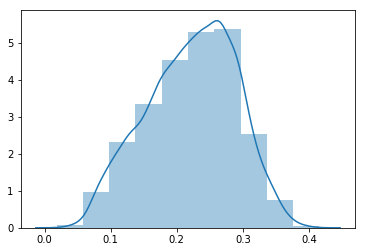

In [29]:
sns.distplot(res, bins=10)

In [30]:
res

19846    0.206044
19524    0.173507
19630    0.272268
7781     0.246945
10114    0.276244
15951    0.253236
20355    0.125751
29207    0.216190
19825    0.161662
1462     0.177455
1584     0.288880
20738    0.291859
3563     0.218472
29996    0.212568
13310    0.268047
26572    0.274291
14986    0.284368
29540    0.322168
27710    0.296849
7463     0.108622
9684     0.154918
13899    0.306043
29003    0.081841
21627    0.230027
15469    0.244897
22693    0.113743
12935    0.214350
14646    0.264234
12553    0.222237
23960    0.291490
           ...   
27875    0.210458
18223    0.152156
18857    0.188943
13719    0.295698
14073    0.259276
18380    0.227986
27260    0.276158
8052     0.234799
14682    0.290860
14736    0.260466
11045    0.265786
4039     0.219107
6075     0.334851
19276    0.241454
14470    0.242781
11027    0.133402
23510    0.273688
5859     0.315968
12641    0.190261
27150    0.363212
3835     0.099154
21414    0.170617
13459    0.093318
16983    0.222456
20488    0

In [31]:
res = results.predict(test.drop('Default', axis='columns'))
prd = res > .5
tn, fp, fn, tp = confusion_matrix(test['Default'], prd).ravel()
(tp + tn) / (tp + fp + tn + fn)

0.778

# Notes for doing it in sklearn

In [32]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [36]:
import numpy as np

In [37]:
np.exp(clf.coef_)

array([[0.99999318, 1.        , 1.        , 1.        , 1.        ]])

In [38]:
clf.coef_

array([[-6.82060255e-06, -1.98423843e-10, -2.44814896e-10,
        -2.05590140e-10, -3.83337232e-09]])

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [40]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

In [41]:
clf.intercept_

array([-0.000571])

In [42]:
clf.coef_

array([[-3.73415503e-06, -9.70136342e-04, -1.23775118e-03,
        -1.02832313e-03, -1.79308834e-02]])

In [43]:
np.exp(clf.coef_)

array([[0.99999627, 0.99903033, 0.99876301, 0.99897221, 0.98222892]])

In [44]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

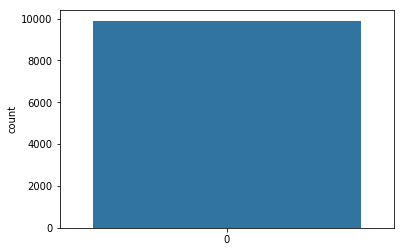

In [45]:
sns.countplot(clf.predict(X_test))

In [46]:
#qcut

In [47]:
X_test.shape

(9900, 5)

In [48]:
p = clf.predict_proba(X_test)

In [49]:
pd.DataFrame(p)[0]

0       0.748176
1       0.818535
2       0.607462
3       0.658088
4       0.818867
5       0.770973
6       0.790123
7       0.787503
8       0.830240
9       0.809883
10      0.746266
11      0.764413
12      0.723334
13      0.758264
14      0.701189
15      0.659032
16      0.658252
17      0.733747
18      0.863247
19      0.758429
20      0.686161
21      0.706787
22      0.668244
23      0.763132
24      0.716198
25      0.702736
26      0.866357
27      0.655271
28      0.726561
29      0.896435
          ...   
9870    0.792436
9871    0.671282
9872    0.758468
9873    0.894108
9874    0.804409
9875    0.895788
9876    0.765817
9877    0.675014
9878    0.906509
9879    0.774689
9880    0.740740
9881    0.737855
9882    0.633711
9883    0.741712
9884    0.934674
9885    0.774748
9886    0.838123
9887    0.754868
9888    0.793555
9889    0.704236
9890    0.751883
9891    0.702181
9892    0.839009
9893    0.818131
9894    0.781533
9895    0.931329
9896    0.773528
9897    0.7033

In [50]:
cuts = pd.qcut(pd.DataFrame(p)[0],4)

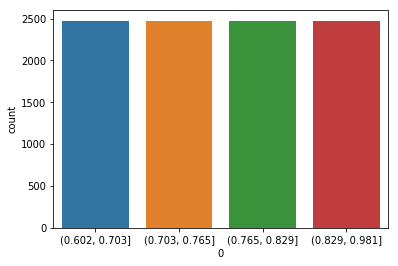

In [51]:
sns.countplot(cuts)

/home/dchen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


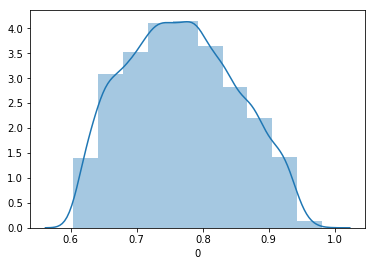

In [52]:
sns.distplot(pd.DataFrame(p)[0], bins=10)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy_score(y_test, predictions)

0.7787878787878788